In [7]:
import numpy as np
import pandas as pd
import arviz as az
from scipy.spatial import KDTree
import h5py
import scipy
from scipy.stats import ks_2samp
from scipy.optimize import brentq
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import curve_fit
from scipy import interpolate
from astropy.cosmology import Planck13, z_at_value
from itertools import product
import sys
from scipy.special import erf
import time
import numpy as np
import scipy.ndimage
#from scipy.misc import logsumexp 
import itertools
from scipy.interpolate import interp1d,interp2d
from astropy.cosmology import Planck13, z_at_value
from scipy.special import gamma, gammainc
from scipy.stats import scoreatpercentile
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from numpy.random import choice
import astropy.cosmology as cosmo
import matplotlib as mpl
import matplotlib.ticker as mtick
import emcee
import pickle
import corner
from scipy import stats
from scipy.stats import poisson
plt.style.use('classic')
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.integrate import simps
from scipy.optimize import brentq
import matplotlib.dates as mdates
import sys
import os
import seaborn as sns
import datetime
from tslearn.clustering import TimeSeriesKMeans
params = {'legend.fontsize': 'large',
        'figure.figsize': (6, 6),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'large',
        'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from matplotlib import rc
rc('font',**{'family':'Times New Roman'})



In [3]:
df=pd.read_csv('temp_datalab_records_linkedin_company.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
np.unique(df['company_name']).size

5028

In [5]:
all_company_names=np.unique(df['company_name'])

In [47]:
df

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426191,902985,2018-07-17,"Diversified Restaurant Holdings, Inc (Nasdaq: ...",488,89,https://www.linkedin.com/company/428083,Restaurants,2018-07-17 17:17:08.8897+00,2018-07-17 17:17:08.889725+00,NaN,http://www.diversifiedrestaurantholdings.com,NaN,NaN,NaN
2426192,903052,2018-07-17,First Financial Northwest Bank,785,118,https://www.linkedin.com/company/497673,Banking,2018-07-17 15:54:35.807059+00,2018-07-17 15:54:35.807085+00,NaN,http://www.ffnwb.com,NaN,NaN,NaN
2426193,902948,2018-07-17,DMC Global Inc.,1521,184,https://www.linkedin.com/company/586890,Oil & Energy,2018-07-17 13:44:19.302482+00,2018-07-17 13:44:19.302508+00,NaN,http://www.dmcglobal.com,NaN,NaN,NaN
2426194,910210,2018-07-17,ServiceSource,27963,2496,https://www.linkedin.com/company/11889,Information Technology and Services,2018-07-17 17:28:48.430667+00,2018-07-17 17:28:48.430717+00,NaN,http://www.servicesource.com,NaN,NaN,NaN


In [60]:
long_ts_companies=[]
counts=0
while counts<100:
    pp=np.random.randint(5000)
    company=all_company_names[pp]
    #company='Goldman Sachs'
    GS_follower_count=df['followers_count'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    #select comapnies with records dating from 2015-9-18 till 2018-07-17
    if ((x_values[-1].year==2018)&(x_values[0].year==2015)&(x_values[0].month==9)&(x_values[0].day<=20)):
        print(company)
        counts+=1
        long_ts_companies.append(company)



NetEase
Lowe's Companies, Inc.
Valero Energy Corporation
Marathon Petroleum Corporation
Tyson Foods
Exelon
The AES Corporation
Brixmor Property Group
Dropbox
Comerica Bank
NetEase
PepsiCo
VF Corporation
NetApp
Apache Corporation
UnitedHealth Group
The Coca-Cola Company
Alcoa
Akamai Technologies
John Deere
Alkermes
Enbridge
Johnson & Johnson
Nasdaq
WisdomTree Asset Management
Cummins Inc.
Bristol-Myers Squibb
Apple
Public Storage
T-Mobile
Atossa Genetics, Inc.
Prudential Financial
Long John Silver's, LLC
Devon Energy
GSK
Weight Watchers
The Dow Chemical Company
Nielsen
C.H. Robinson
Starbucks
Macerich
Target
C.H. Robinson
Southwestern Energy
Harley-Davidson Motor Company
RadNet
NVIDIA
Vodafone
Morgan Stanley
FMC Technologies
Asbury Automotive Group
DaVita Kidney Care
Apple
Google
U.S. Bank
The Walt Disney Company
Mallinckrodt Pharmaceuticals
Intercontinental Exchange
PulteGroup
L Brands
Google
BNY Mellon
Alleghany Corporation
Asbury Automotive Group
Kohl's Department Stores
O'Reilly Aut

In [66]:
np.savetxt('list_of_companies_with_long_records.dat',np.array(long_ts_companies),fmt='%s')

In [88]:
ts_dataset=np.ones(100*1000*1).reshape(100,1000,1)
for ii,company in enumerate(long_ts_companies):
    GS_follower_count=df['followers_count'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    starting_point=len(GS_follower_count)-1000 # to enforce all have the same length and roughly the same starting date
    if starting_point<0:continue
    ts_dataset[ii,:,0]=GS_follower_count[starting_point:]

In [104]:
#remove rows that are empty (here all entries being =1.0)
for ii in range(0,100):
    if ts_dataset[ii,0,0]==1.0:
        print(ii)

22
64
89


In [109]:
modified_ts_dataset=np.delete(ts_dataset,[22,64,89],0)

In [112]:
modified_ts_dataset.shape

(97, 1000, 1)

In [ ]:
#scale the ts_count dataset
for i in range(0,modified_ts_dataset.shape[0]):
    modified_ts_dataset[i,:,0]=modified_ts_dataset[i,:,0]/modified_ts_dataset[i,:,0].max()

In [118]:
#down sample the data series from 1000 data points to 100 to boost the computation speed
down_sampled_ts_dataset=np.ones(97*100*1).reshape(97,100,1)
for i in range(0,97):
    down_sampled_ts_dataset[i,:,0]=modified_ts_dataset[i,::10,0]

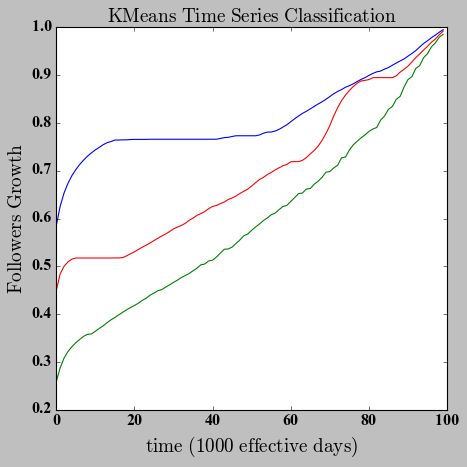

In [124]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,random_state=0).fit(down_sampled_ts_dataset)
fig,ax=plt.subplots(1,1)
for i in range(0,3):
    ax.plot(km.cluster_centers_[i])
ax.set_ylabel(r'$\rm Followers~Growth$')
ax.set_xlabel(r'$\rm time~(1000~effective~days)$')
ax.set_title(r'$\rm KMeans~Time~Series~Classification$')
plt.tight_layout()
fig.savefig('ts_classification_dtw.pdf')

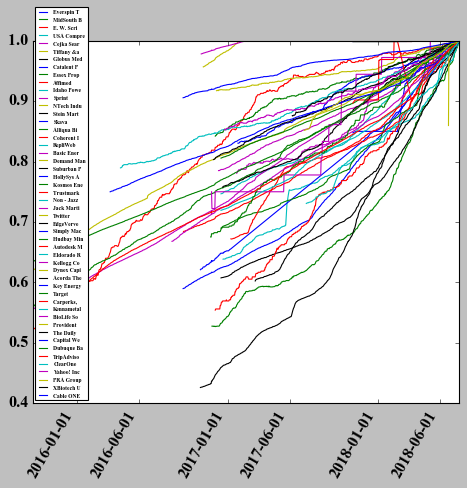

In [8]:
fig,ax=plt.subplots(1,1)
for ii in range(0,50):
    pp=np.random.randint(5000)
    company=all_company_names[pp]
    GS_follower_count=df['followers_count'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    y_values=GS_follower_count.values
    ax.plot(x_values,y_values/y_values.max(),label=company[:10])

#ax.set_yscale('log')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator((1,6)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
ax.legend(loc=3, prop={'size': 5})
plt.tight_layout()
plt.show()


In [96]:
max_f_c=[]
for c_name in all_company_names:
    company_follower_count=(df['followers_count'][df['company_name']==c_name])
    max_followers=np.max(company_follower_count)
    print(c_name,max_followers)
    max_f_c.append(max_followers)
    

 Professional Diversity Network 2656
1-800-FLOWERS.COM, INC. 11484
1800PetMeds 1771
1st Constitution Bank 584
1st Security Bank of Washington 751
1st Source Bank 3523
2020b LLC 8
21 Club 610
21Vianet Group,Inc. 4298
21st Century Fox 12401
2K 40524
3 Phase Line Construction Inc. 415
3D Material Technologies, LLC 931
3D Systems Corporation 36102
3M 852348
3M Electronic Monitoring Ltd. 5682
40|86 Advisors 1785
51job 6766
58.Com Inc 4753
8x8 17223
99 2416
A. H. Belo 1282
A. O. Smith Corporation 28849
A. Schulman, Inc. 17310
A.J. Oster, LLC 484
A.O. Smith 12579
A.P. Pharma, Inc. 239
A10 Networks, Inc 18485
AAM - American Axle & Manufacturing 43185
AAON 1801
AAON, Inc. 2585
AAR 19588
AAR CORP. 17350
AB 32767
ABB 1154903
ABB Enterprise Software 61244
ABB’s Enterprise Software Product Group 61175
ABF Freight 16360
ABM Industries 36628
ABX Air, Inc. 3334
AC Immune 2935
ACADIA Pharmaceuticals Inc. 11047
ACCO Brands 13955
ACI Worldwide 32487
ACNB Bank 290
ACX.com 558
ADC 4605
ADMA Biologics, Inc.

Angie's List 12983
AngioDynamics 7366
AngloGold Ashanti 158838
Anheuser-Busch InBev 250820
Anika Therapeutics 3926
Anixter 64513
Anixter Network Solutions 912
Ann Taylor 8686
Annaly Capital Management 1394
Anodyne Health 922
Antares Pharma Inc. 1717
Antero Resources 12163
Anthem 42657
Anthem Worldwide 4127
Anthem, Inc. 107766
Anworth Mortgage 56
Aon 495821
Aon Benfield 23109
Aon France 8129
Aon Hewitt 224226
Apache Corporation 129593
Apache Energy 4375
ApartmentHomeLiving.com 452
Apartments.com 4887
Apogee Enterprises, Inc. 2034
Apollo Endosurgery 5423
Apollo Global Management LLC 41021
Apollo Reality Trust 0
AppDynamics 41814
AppFolio Inc. 5842
AppFolio, Inc. 7222
Appian Corporation 16794
Apple 4743555
Applebee's 41300
Applebee's Neighborhood Grill + Bar 50468
ApplianceSmart, Inc. 57
Applied Industrial Technologies 13216
Applied Materials 136278
Applied Optoelectronics, Inc. 1966
Applied Semantics 7
Approach Resources Inc. 3476
Apptio 20930
Apractis Solutions, LLC 78
Apricus Bioscienc

Biomet 47977
Biomet 3i 7216
BiondVax Pharmaceuticals Ltd. 610
Biostar Pharmaceuticals Inc 41
Bison Coach - A Navistar Company 56
BizBuySell 2609
BizQuest 417
Black Box 22040
Black Box Network Services 17997
Black Hills Corporation 8545
Black Stone Minerals, L.P. 2257
BlackBerry 267084
BlackLine 21201
BlackRock 411872
BlackRock Kelso Capital 266
Blackbaud 34223
Blacksmith Applications 984
Block Advisors 1841
Bloomin'​ Brands, Inc. 25681
Bloomingdale's 90907
Blucora 6180
Blue Apron 31220
Blue Bird Corporation 2920
Blue Hills Bank 1534
BlueKite 138
BlueLinx Corporation 14427
Bluegreen Vacations 13581
Blueknight Energy Partners, LP 3073
Bluemercury 9595
Blueprint Medicines 4492
Boardwalk Pipeline Partners, LP 7052
Boeing 1005671
BofI Federal Bank 4088
Boingo Wireless 7037
Boise Cascade Company 15309
Bojangles'​ Restaurants, Inc. 10338
Bold360 3308
Bonanza Creek Energy, Inc. 3954
Bonnell Aluminum 1783
Bonso Electronics International Inc. 1
Bookstep 9
Boot Barn 6073
Booz Allen Hamilton 31923

Central Pacific Bank 1496
Central Valley Community Bank 341
Century Aluminum 3832
Century Bank 1011
Century Communities, Inc. (NYSE:CCS) 3483
CenturyLink 94466
CenturyLink Business 11598
Cepheid 17153
Ceragon Networks 20749
Cerecor Inc. 365
Cerner Corporation 145535
Cerus 4306
Cervejaria Ambev 528662
Cesca Therapeutics Inc. 434
Champions Oncology, Inc. 3064
Changyou.com (China) 12352
Chanticleer Holdings, Inc. 459
Charles & Colvard, Ltd. 818
Charles &amp; Colvard, Ltd. 650
Charles River Associates 12647
Charles River Laboratories 44544
Charles Schwab 117472
Charlotte Motor Speedway 2663
Charm Communications Inc (chrm) 35
Charmin Paper Products Co 10
Chart Industries, Inc. 11578
Charter Communications 67742
CharterBank 376
Chase Brass and Copper Company, LLC 1721
Check Point Software Technologies, Inc. 46890
Check Point Software Technologies, Ltd. 71751
Check Point Software, Ltd 47035
Cheetah Mobile 22141
Chegg Inc. 22163
Chembio Diagnostic Systems, Inc. 2370
Chemical Bank 8281
ChemoCen

KeyboardInterrupt: 

In [1]:
from tslearn.clustering import TimeSeriesKMeans

In [11]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,random_state=0).fit(X)
fig,ax=plt.subplots(1,1)
for i in range(0,3):
    ax.plot(km.cluster_centers_[i])


In [12]:
X = random_walks(n_ts=50, sz=32, d=1)

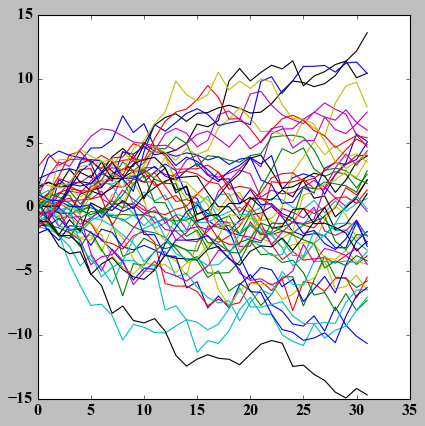

In [30]:
fig,ax=plt.subplots(1,1)
for i in range(0,50):
    ax.plot(X[i,:,0])

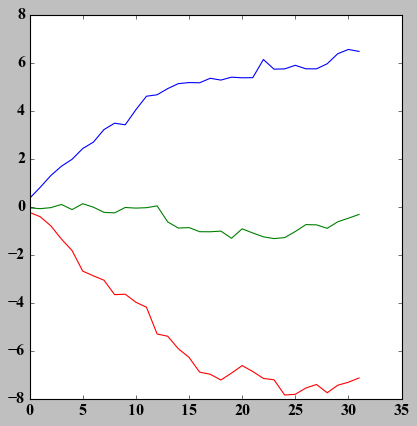

In [33]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,random_state=0).fit(X)
fig,ax=plt.subplots(1,1)
for i in range(0,3):
    ax.plot(km.cluster_centers_[i])

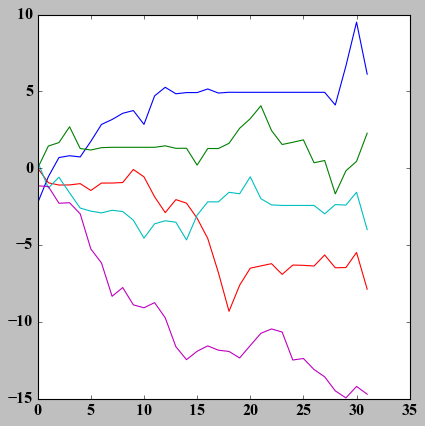

In [36]:
km = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=5,random_state=0).fit(X)
fig,ax=plt.subplots(1,1)
for i in range(0,km.n_clusters):
    ax.plot(km.cluster_centers_[i])

In [40]:
X1=np.random.normal(0,1,50)
X2=np.random.normal(0,1,30)
X3=np.random.normal(0,1,100)

In [45]:
X_f=np.array([[X1,X2,X3]])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [46]:
X_f.shape

(1, 3)